### Model to reassign all true uniques: set coverage

Read individual data

- Geographic level: tract
- Attributes: VOTINGAGE (2) $*$ HISPANIC (2) $*$ CENRACE (63)

In [1]:
import pandas as pd
import numpy as np

filename_hist = 'data/franklin_hist.csv'
hist = pd.read_csv(filename_hist)

# block to tract
hist['TRACT'] = hist['GEOID10'].astype(str).str[:11]
col_names = hist.columns.to_numpy()
col_names = np.delete(col_names, [0, -1])
hist = hist.groupby('TRACT').sum()[col_names]
hist = hist.reset_index()
hist

,TRACT,00000000,00000001,00000002,00000003,00000004,00000005,00000006,00000007,00000008,...,07010153,07010154,07010155,07010156,07010157,07010158,07010159,07010160,07010161,07010162
0,39049000110,438,6,0,7,0,4,5,1,0,...,0,0,0,0,0,0,0,0,0,0
1,39049000120,467,4,0,11,0,2,2,0,2,...,0,0,0,0,0,0,0,0,0,0
2,39049000210,430,11,0,6,0,4,4,1,4,...,0,0,0,0,0,0,0,0,0,0
3,39049000220,653,3,1,12,0,6,7,0,6,...,0,0,0,0,0,0,0,0,0,0
4,39049000310,313,205,0,17,0,2,19,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,39049010500,1821,35,1,409,0,2,5,2,22,...,0,0,0,0,0,0,0,0,0,0
280,39049010601,1408,36,0,146,0,3,12,0,15,...,0,0,0,0,0,0,0,0,0,0
281,39049010602,1585,45,3,139,0,4,7,2,9,...,0,0,0,0,0,0,0,0,0,0
282,39049010700,83,11,0,4,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# HHGQ (8) $*$ VOTINGAGE (2) $*$ HISPANIC (2) $*$ CENRACE (63) to VOTINGAGE (2) $*$ HISPANIC (2) $*$ RACE (7)
n2, n3, n4 = 2, 2, 63

for y in range(n2):  # voting age
    y = '{number:0{width}d}'.format(width=2, number=y)
    col_names = [col for col in hist.columns if y in col[2:4] and len(col)==8]

    for z in range(n3):  # ethnicity
        z = '{number:0{width}d}'.format(width=2, number=z)
        col_names2 = [col for col in col_names if z in col[4:6]]

        col_two_or_more_races = []
        for x in range(n4):  # race
            if x >= 0 and x <= 5:
                x = '{number:0{width}d}'.format(width=2, number=x)
                col_names3 = [col for col in col_names2 if x in col[6:8]]
                hist[x + y + z] = hist[col_names3].sum(axis=1)
            else:
                x = '{number:0{width}d}'.format(width=2, number=x)
                col_names3 = [col for col in col_names2 if x in col[6:8]]
                col_two_or_more_races.extend(col_names3)
        hist['06' + y + z] = hist[col_two_or_more_races].sum(axis=1)

hist.drop([col for col in hist.columns if len(col)==8], axis=1, inplace=True)
hist            

,TRACT,000000,010000,020000,030000,040000,050000,060000,000001,010001,...,040100,050100,060100,000101,010101,020101,030101,040101,050101,060101
0,39049000110,438,6,0,7,0,4,6,29,0,...,0,2,1,17,3,0,0,0,6,0
1,39049000120,467,4,0,11,0,2,6,13,0,...,1,0,3,18,0,0,0,0,4,0
2,39049000210,430,11,0,6,0,4,13,10,0,...,0,2,4,34,0,0,0,0,4,0
3,39049000220,653,3,1,12,0,6,13,20,0,...,0,6,4,16,0,2,0,0,8,1
4,39049000310,313,205,0,17,0,2,25,15,1,...,2,5,8,40,1,1,0,0,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,39049010500,1821,35,1,409,0,2,33,27,0,...,1,8,8,70,0,1,0,0,19,0
280,39049010601,1408,36,0,146,0,3,32,16,3,...,0,2,4,86,0,0,0,0,13,1
281,39049010602,1585,45,3,139,0,4,19,13,1,...,0,8,11,71,2,2,0,0,25,0
282,39049010700,83,11,0,4,0,0,2,6,1,...,1,2,2,10,0,0,0,0,14,0


Aggregated data

In [3]:
# HISPANIC (2) $*$ RACE (7)
n3, n4 = 2, 7

hist2 = hist.copy()
for x in range(n3):  # ethnicity
    x = '{number:0{width}d}'.format(width=2, number=x)
    for y in range(n4):  # race
        y = '{number:0{width}d}'.format(width=2, number=y)
        col_names = [col for col in hist2.columns if x in col[4:6] and y in col[0:2]]
        hist2[y + x] = hist2[col_names].sum(axis=1)

hist2.drop([col for col in hist2.columns if len(col)==6], axis=1, inplace=True)
hist2    

,TRACT,0000,0100,0200,0300,0400,0500,0600,0001,0101,0201,0301,0401,0501,0601
0,39049000110,3171,37,1,36,0,6,7,46,3,1,0,0,7,1
1,39049000120,2985,44,1,42,1,2,9,31,0,2,0,0,5,0
2,39049000210,2729,52,5,32,0,6,17,44,0,0,0,0,4,0
3,39049000220,3500,32,2,55,0,12,17,36,0,2,0,0,12,6
4,39049000310,2080,737,2,70,2,7,33,55,2,1,0,0,54,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,39049010500,6402,108,3,1177,1,10,41,97,0,1,2,0,33,4
280,39049010601,3831,125,3,453,0,5,36,102,3,0,0,0,27,3
281,39049010602,5402,154,6,420,0,12,30,84,3,3,0,0,42,1
282,39049010700,1046,118,4,61,1,2,4,16,1,0,0,0,17,0


In [4]:
# RACE (7)
n4 = 7

hist3 = hist.copy()
for y in range(n4):  # race
    y = '{number:0{width}d}'.format(width=2, number=y)
    col_names = [col for col in hist3.columns if y in col[0:2]]
    hist3[y] = hist3[col_names].sum(axis=1)

hist3.drop([col for col in hist3.columns if len(col)==6], axis=1, inplace=True)
hist3    

,TRACT,00,01,02,03,04,05,06
0,39049000110,3217,40,2,36,0,13,8
1,39049000120,3016,44,3,42,1,7,9
2,39049000210,2773,52,5,32,0,10,17
3,39049000220,3536,32,4,55,0,24,23
4,39049000310,2135,739,3,70,2,61,37
...,...,...,...,...,...,...,...,...
279,39049010500,6499,108,4,1179,1,43,45
280,39049010601,3933,128,3,453,0,32,39
281,39049010602,5486,157,9,420,0,54,31
282,39049010700,1062,119,4,61,1,19,4


Model inputs

In [5]:
import numpy as np

# define all the input data for the model
I, K = hist.shape[0], hist.shape[1] - 1
nj = 10
r = 3

V = []
for k in range(1, K+1):
    V.append(hist.index[(hist.iloc[:,k] <= r) & (hist.iloc[:,k] > 0)].tolist())

count = 0
for listElem in V:
    count += len(listElem)  
print(count)

A = hist.iloc[:,1:].to_numpy()
print(A.shape, A[0])

W = np.zeros([I, I, K])
for i in range(I):
    for j in range(I):
        for k in range(K):
            if A[i, k] == 0 or A[j, k] == 0:
                W[i, j, k] = 50
            else:
                W[i, j, k] = 1 / A[i, k] + 1 / A[j, k]
print(W.shape, W[0])            

1497
(284, 28) [ 438    6    0    7    0    4    6   29    0    1    0    0    1    1
 2733   31    1   29    0    2    1   17    3    0    0    0    6    0]
(284, 284, 28) [[4.56621005e-03 3.33333333e-01 5.00000000e+01 ... 5.00000000e+01
  3.33333333e-01 5.00000000e+01]
 [4.42443265e-03 4.16666667e-01 5.00000000e+01 ... 5.00000000e+01
  4.16666667e-01 5.00000000e+01]
 [4.60868642e-03 2.57575758e-01 5.00000000e+01 ... 5.00000000e+01
  4.16666667e-01 5.00000000e+01]
 ...
 [2.91401985e-03 1.88888889e-01 5.00000000e+01 ... 5.00000000e+01
  2.06666667e-01 5.00000000e+01]
 [1.43312978e-02 2.57575758e-01 5.00000000e+01 ... 5.00000000e+01
  2.38095238e-01 5.00000000e+01]
 [5.00000000e+01 5.00000000e+01 5.00000000e+01 ... 5.00000000e+01
  5.00000000e+01 5.00000000e+01]]


Coverage I: all except the origin and other uniques

In [29]:
import numpy as np

## define coverage aijk
T = np.ones((I, I, K))

for i in range(I): 
    for j in range(I):
        for k in range(K):
            if i == j or j in V[k]:
                T[i, j, k] = 0
T   

array([[[0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 0., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 0., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 0., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

Coverage II: neighboring

In [30]:
# import numpy as np
# import geopandas as gpd
# from libpysal import weights

# filename_gdf = 'data/franklin_tract10.json'
# gdf = gpd.read_file(filename_gdf)
# gdf['GEOID10'] = gdf['GEOID10'].astype(str)
# wr = weights.distance.KNN.from_dataframe(gdf, k=9)
# print(wr.neighbors[0])

# ## define coverage aijk
# T = np.zeros((I, I, K))
# for i in wr.neighbors:
#     neighbors_idx = wr.neighbors[i]
#     for j in neighbors_idx:
#         geoid = gdf.loc[[j],'GEOID10'].values[0]
#         # idx = hist.loc[hist["TRACT"] == geoid].index[0]
#         for k in range(K):
#             if j not in V[k]:
#                 T[i, j, k] = 1
# T        

Run model

In [31]:
import pandas as pd
from gurobipy import Model, GRB, LinExpr, quicksum

# initialize model
m = Model('td')
# m.Params.LogToConsole = 0

# add objective function
obj = LinExpr()

# add decision variables and objective function
theta = {}
for k in range(K):
    if len(V[k]) == 0:
        continue
    for i in V[k]:
        for j in range(I):
            # decision variables
            theta[i, j, k] = m.addVar(vtype=GRB.CONTINUOUS, lb=0, ub=1, name="theta_%d_%d_%d"%(i, j, k))
            # m.update()
            # objective
            obj += theta[i, j, k] * A[i, k] * W[i, j, k]

        # add constraints
        m.addConstr(quicksum(theta[i, j, k] for j in range(I)) == 1)
        m.addConstr(quicksum(T[i, j, k] * theta[i, j, k] for j in range(I)) == 1)

for j in range(I):
    m.addConstr(quicksum(quicksum(theta[i, j, k] * A[i, k] for i in V[k]) for k in range(K)) <= nj)

m.setObjective(obj, GRB.MINIMIZE)

m.update()
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 3278 rows, 425148 columns and 1145003 nonzeros
Model fingerprint: 0xefdc16ff
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve time: 0.51s
Presolved: 3278 rows, 425148 columns, 1145003 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.876e+04
 Factor NZ  : 6.437e+04 (roughly 10 MB of memory)
 Factor Ops : 1.140e+07 (less than 1 second per iteration)
 Threads    : 4

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.91555329e+06  0.00000000e+00  2.44e+02 0.00e+00  8.09e+01     1s
   1   2.56776418e+05 -3.01360120e+04  3.0

In [32]:
# for var in m.getVars():
#     print(var.VarName, var.X)

with open('data/theta/SCM_FA3_franklin.csv', 'w') as f:
    for var in m.getVars():
        f.write(str(var.VarName) + ',' + str(var.X) + '\n')

Error: Original

C:\Users\Yue\AppData\Local\Temp\ipykernel_11152\1614917223.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids.geometry = gdf.centroid


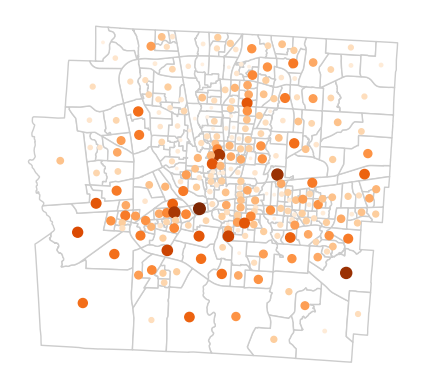

In [1]:
import csv
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt  # Graphics

filename_nhgis = 'data/franklin_nhgis_tract.csv'
data_nhgis = pd.read_csv(filename_nhgis)
data_nhgis = data_nhgis[['GEOID10', 'H75007_dp', 'H75007_sf']]

filename_gdf = 'data/franklin_tract10.json'
gdf = gpd.read_file(filename_gdf)

centroids = gdf.copy()
centroids.geometry = gdf.centroid
centroids['GEOID10'] = centroids['GEOID10'].astype(np.int64)
merged = centroids.set_index('GEOID10').join(data_nhgis.set_index('GEOID10'))
merged = merged.sort_index()
merged["original"] = merged['H75007_sf'] * 3 # to get reasonable plotable number

fig = gdf.plot(facecolor='w', edgecolor='0.8', legend=True)
merged.plot(column='original', markersize='original', cmap='Oranges', ax=fig)
fig.set_axis_off()
fig.get_figure().savefig('plot/error_original_franklin.eps')

Error: NHGIS

In [ ]:
# import csv
# import numpy as np
# import pandas as pd
# import geopandas as gpd
# import matplotlib.pyplot as plt  # Graphics

# filename_nhgis = 'data/nhgis_ppdd_20210608_tract.csv'
# data_nhgis = pd.read_csv(filename_nhgis)
# data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
# data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
# data_nhgis['TRACT'] = data_nhgis["gisjoin"].str.slice(8, 14)
# data_nhgis['GEOID10'] = data_nhgis[['STATE', 'COUNTY', 'TRACT']].apply(lambda x: ''.join(x), axis=1)
# data_nhgis = data_nhgis[(data_nhgis["STATE"] == '39') & (data_nhgis["COUNTY"] == '049')]
# # data_nhgis = data_nhgis[['GEOID10', 'H75007_dp', 'H75007_sf']]
# # data_nhgis = data_nhgis.loc[(data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]
# data_nhgis.to_csv("data/franklin_nhgis_tract.csv", index=False)
# data_nhgis

4
21


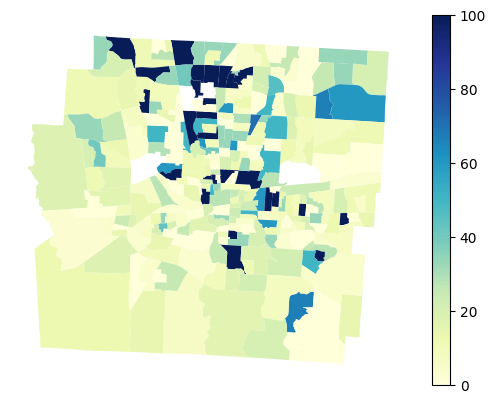

In [6]:
import csv
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt  # Graphics

filename_nhgis = 'data/franklin_nhgis_tract.csv'
data_nhgis = pd.read_csv(filename_nhgis)
data_nhgis = data_nhgis[['GEOID10', 'H75007_dp', 'H75007_sf']]
print(len(data_nhgis[(data_nhgis['H75007_dp']==1) & (data_nhgis['H75007_sf']==1)]))
print(len(data_nhgis[data_nhgis['H75007_dp']==1]))

filename_gdf = 'data/franklin_tract10.json'
gdf = gpd.read_file(filename_gdf)
gdf['GEOID10'] = gdf['GEOID10'].astype(np.int64)
merged = gdf.set_index('GEOID10').join(data_nhgis.set_index('GEOID10'))
merged = merged.sort_index()
merged["diff"] = abs(merged["H75007_dp"] - merged["H75007_sf"]) / (merged["H75007_dp"] + merged["H75007_sf"]) * 100

fig = merged.plot(column='diff', legend=True, cmap='YlGnBu', vmin=0, vmax=100)
fig.set_axis_off()
fig.get_figure().savefig('plot/error_nhgis_franklin.eps')

Error: FA

C:\Users\Yue\AppData\Local\Temp\ipykernel_20744\4088104524.py:46: RuntimeWarning: invalid value encountered in double_scalars
  theta2_fa[i, j, k2] = sum1 / sum2


0
0


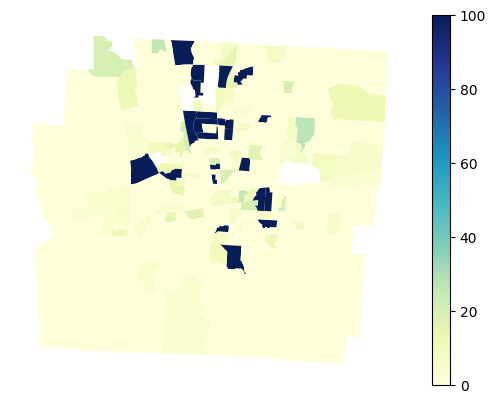

In [7]:
## FA
import csv
import numpy as np
import geopandas as gpd
from libpysal import weights
import esda
import matplotlib.pyplot as plt  # Graphics

filename_gdf = 'data/franklin_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged_fa = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged_fa["0200_before"] = merged_fa["0200"]
merged_fa = merged_fa.sort_index()

with open('data/theta/SCM_FA_franklin.csv', newline='') as f:
    reader = csv.reader(f)
    data_fa = list(reader)

theta_fa = np.zeros([I, I, K])
for k in range(K):
    for i in range(I):
        if i not in V[k] and A[i, k] != 0:
            theta_fa[i, i, k] = 1
for var in data_fa:
    name = var[0].split("_")
    theta_fa[int(name[1]), int(name[2]), int(name[3])] = var[1]

K2 = hist2.shape[1] - 1
Q2 = np.zeros([K2, K])
for idx2, col2 in enumerate(hist2.iloc[:,1:].columns):
    x = col2[0:2]
    y = col2[2:4]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2] and y == col[4:6]:
            Q2[idx2, idx] = 1
        else:
            Q2[idx2, idx] = 0
theta2_fa = np.zeros([I, I, K2])
for k2 in range(K2):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q2[k2, k] * theta_fa[i, j, k] * A[i, k]
                sum2 += Q2[k2, k] * A[i, k]
            theta2_fa[i, j, k2] = sum1 / sum2           
theta2_fa[~np.isfinite(theta2_fa)] = 0

A2 = hist2.iloc[:,1:].to_numpy()
A2_fa = np.zeros([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in range(I):
            sum += theta2_fa[i, j, k2] * A2[i, k2]
        A2_fa[j, k2] = sum

A2_fa = pd.DataFrame(A2_fa)
A2_fa["TRACT"] = hist2["TRACT"]
merged_fa = merged_fa.join(A2_fa.set_index('TRACT'))
merged_fa["0200_after"] = merged_fa[2]
merged_fa['0200_after'] = merged_fa['0200_after'].fillna(0)
merged_fa = merged_fa.sort_index()
merged_fa["diff"] = abs(merged_fa["0200_after"] - merged_fa["0200_before"]) / (merged_fa["0200_after"] + merged_fa["0200_before"]) * 100
print(len(merged_fa[(merged_fa['0200_after']==1) & (merged_fa['0200_before']==1)]))
print(len(merged_fa[merged_fa['0200_after']==1]))

fig = merged_fa.plot(column='diff', legend=True, cmap='YlGnBu', vmin=0, vmax=100)
fig.set_axis_off()
fig.get_figure().savefig('plot/error_scm_fa_franklin.eps')

Error: Scatter plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


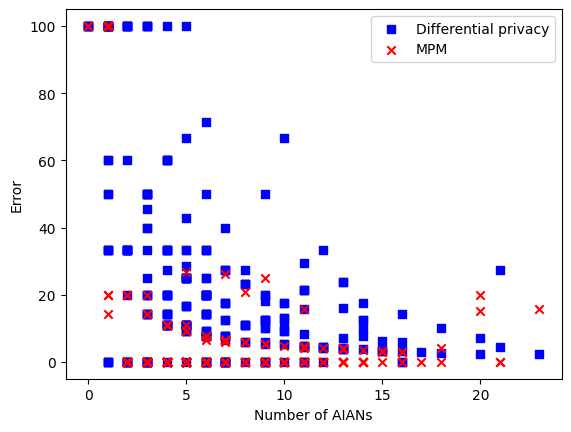

In [10]:
import matplotlib.pyplot as plt
import numpy as np

data = merged.join(merged_fa)
plt.scatter(data["H75007_sf"], data["diff_dp"], c='b', marker="s", label='Differential privacy')
plt.scatter(data["H75007_sf"], data["diff"], c='r', marker="x", label='MEM')
plt.legend(loc='upper right')
plt.xlabel("Number of non-Hispanic AIANs")
plt.ylabel("Error")
plt.savefig('plot/error_scm_fa_xy_franklin.eps')

Diversity: Original

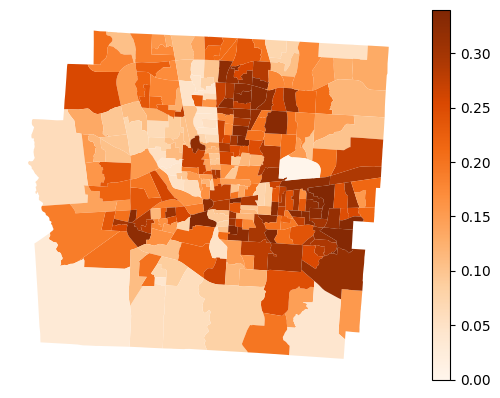

In [9]:
import csv
import numpy as np
import geopandas as gpd
from libpysal import weights
import esda
import matplotlib.pyplot as plt  # Graphics

filename_gdf = 'data/franklin_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged_ori = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged_ori = merged_ori.sort_index()

A2_ori = hist2.iloc[:,1:].to_numpy()
A2_ori = pd.DataFrame(A2_ori)
A2_ori["SUM"] = A2_ori.sum(axis=1)
A2_ori["TRACT"] = hist2["TRACT"]
for i in range(14):
    A2_ori[i] = A2_ori[i] / A2_ori["SUM"]
    A2_ori[i + 20] = A2_ori[i] * np.log(1 / A2_ori[i])
A2_ori = A2_ori.fillna(0)
A2_ori["ENTROPY_ORI"] = A2_ori[0] * A2_ori[20] + A2_ori[1] * A2_ori[21] + A2_ori[2] * A2_ori[22] + A2_ori[3] * A2_ori[23] + A2_ori[4] * A2_ori[24] + A2_ori[5] * A2_ori[25] + A2_ori[6] * A2_ori[26] + A2_ori[7] * A2_ori[27] + A2_ori[8] * A2_ori[28] + A2_ori[9] * A2_ori[29] + A2_ori[10] * A2_ori[30] + A2_ori[11] * A2_ori[31] + A2_ori[12] * A2_ori[32] + A2_ori[13] * A2_ori[33]
A2_ori = A2_ori[['TRACT', "ENTROPY_ORI"]]

merged_ori = merged_ori.join(A2_ori.set_index('TRACT'))
merged_ori = merged_ori.sort_index()

fig = merged_ori.plot(column='ENTROPY_ORI', legend=True, cmap='Oranges')
fig.set_axis_off()
fig.get_figure().savefig('plot/entropy_original_franklin.eps')

Diversity: SCM1

C:\Users\Yue\AppData\Local\Temp\ipykernel_14748\2089772313.py:40: RuntimeWarning: invalid value encountered in double_scalars
  theta2_fa[i, j, k2] = sum1 / sum2


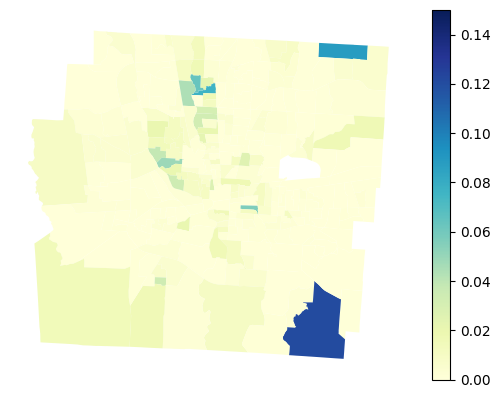

In [10]:
## SCM
import csv
import numpy as np
import geopandas as gpd
from libpysal import weights
import esda
import matplotlib.pyplot as plt  # Graphics

with open('data/theta/SCM_FA_franklin.csv', newline='') as f:
    reader = csv.reader(f)
    data_fa = list(reader)

theta_fa = np.zeros([I, I, K])
for k in range(K):
    for i in range(I):
        if i not in V[k] and A[i, k] != 0:
            theta_fa[i, i, k] = 1
for var in data_fa:
    name = var[0].split("_")
    theta_fa[int(name[1]), int(name[2]), int(name[3])] = var[1]

K2 = hist2.shape[1] - 1
Q2 = np.zeros([K2, K])
for idx2, col2 in enumerate(hist2.iloc[:,1:].columns):
    x = col2[0:2]
    y = col2[2:4]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2] and y == col[4:6]:
            Q2[idx2, idx] = 1
        else:
            Q2[idx2, idx] = 0
theta2_fa = np.zeros([I, I, K2])
for k2 in range(K2):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q2[k2, k] * theta_fa[i, j, k] * A[i, k]
                sum2 += Q2[k2, k] * A[i, k]
            theta2_fa[i, j, k2] = sum1 / sum2           
theta2_fa[~np.isfinite(theta2_fa)] = 0

A2 = hist2.iloc[:,1:].to_numpy()
A2_fa = np.zeros([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in range(I):
            sum += theta2_fa[i, j, k2] * A2[i, k2]
        A2_fa[j, k2] = sum

A2_fa = pd.DataFrame(A2_fa)
A2_fa["SUM"] = A2_fa.sum(axis=1)
A2_fa["TRACT"] = hist2["TRACT"]
for i in range(14):
    A2_fa[i] = A2_fa[i] / A2_fa["SUM"]
    A2_fa[i + 20] = A2_fa[i] * np.log(1 / A2_fa[i])
A2_fa = A2_fa.fillna(0)
A2_fa["ENTROPY_SCM"] = A2_fa[0] * A2_fa[20] + A2_fa[1] * A2_fa[21] + A2_fa[2] * A2_fa[22] + A2_fa[3] * A2_fa[23] + A2_fa[4] * A2_fa[24] + A2_fa[5] * A2_fa[25] + A2_fa[6] * A2_fa[26] + A2_fa[7] * A2_fa[27] + A2_fa[8] * A2_fa[28] + A2_fa[9] * A2_fa[29] + A2_fa[10] * A2_fa[30] + A2_fa[11] * A2_fa[31] + A2_fa[12] * A2_fa[32] + A2_fa[13] * A2_fa[33]
A2_fa = A2_fa[['TRACT', "ENTROPY_SCM"]]

merged_ori = merged_ori.join(A2_fa.set_index('TRACT'))
merged_ori["ENTROPY_DIFF"] = abs(merged_ori["ENTROPY_SCM"] - merged_ori["ENTROPY_ORI"]) / (merged_ori["ENTROPY_SCM"] + merged_ori["ENTROPY_ORI"])
merged_ori = merged_ori.sort_index()

fig = merged_ori.plot(column='ENTROPY_DIFF', legend=True, cmap='YlGnBu', vmin=0, vmax=0.15)
fig.set_axis_off()
fig.get_figure().savefig('plot/entropy_scm_fa_franklin.eps')

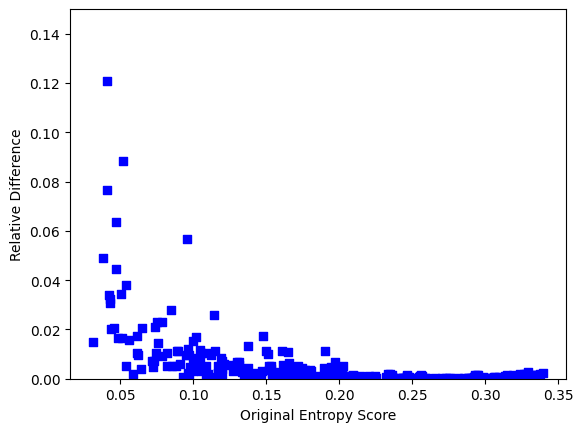

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(merged_ori["ENTROPY_ORI"], merged_ori["ENTROPY_DIFF"], c='b', marker="s")
plt.xlabel("Original Entropy Score")
plt.ylim(0, 0.15)
plt.ylabel("Relative Difference")
plt.savefig('plot/entropy_scm_fa_xy_franklin.eps')

LISA:FA

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


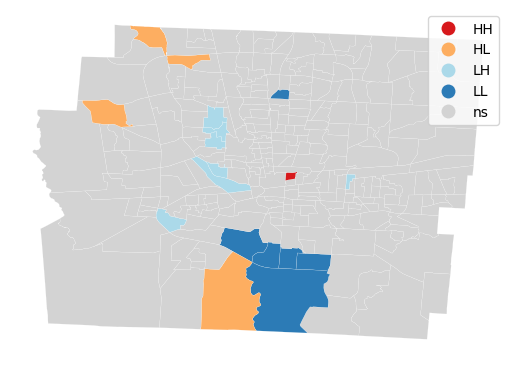

In [8]:
import numpy as np
import geopandas as gpd
from libpysal import weights
import esda
import matplotlib.pyplot as plt  # Graphics
from splot.esda import lisa_cluster

np.random.seed(0)
filename_gdf = 'data/franklin_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged_fa = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged_fa["0101_pct_before"] = merged_fa["0200"]/(merged_fa["0000"]+merged_fa["0100"]+merged_fa["0200"]+merged_fa["0300"]+merged_fa["0400"]+merged_fa["0500"]+merged_fa["0600"]+merged_fa["0001"]+merged_fa["0101"]+merged_fa["0201"]+merged_fa["0301"]+merged_fa["0401"]+merged_fa["0501"]+merged_fa["0601"]) * 100
merged_fa = merged_fa.sort_index()

gdf['GEOID10'] = gdf['GEOID10'].astype(str)
w = weights.distance.KNN.from_dataframe(gdf, k=20)
w.transform = 'R'
lisa = esda.moran.Moran_Local(merged_fa["0101_pct_before"], w)
fig = lisa_cluster(lisa, gdf)
plt.savefig('plot/lisa_original_franklin.eps', format='eps')

C:\Users\Yue\AppData\Local\Temp\ipykernel_16340\3862207102.py:38: RuntimeWarning: invalid value encountered in double_scalars
  theta2_fa[i, j, k2] = sum1 / sum2
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


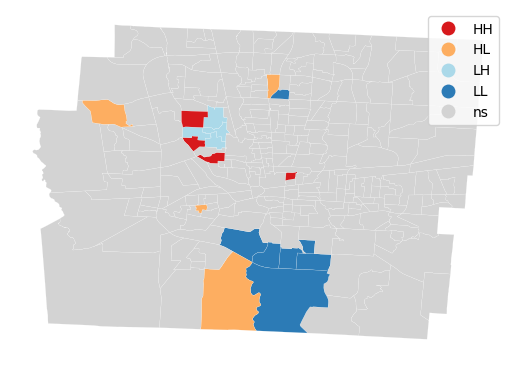

In [9]:
## FA
import csv
import numpy as np
import geopandas as gpd
from splot.esda import lisa_cluster

with open('data/theta/SCM_FA_franklin.csv', newline='') as f:
    reader = csv.reader(f)
    data_fa = list(reader)

theta_fa = np.zeros([I, I, K])
for k in range(K):
    for i in range(I):
        if i not in V[k] and A[i, k] != 0:
            theta_fa[i, i, k] = 1
for var in data_fa:
    name = var[0].split("_")
    theta_fa[int(name[1]), int(name[2]), int(name[3])] = var[1]

K2 = hist2.shape[1] - 1
Q2 = np.zeros([K2, K])
for idx2, col2 in enumerate(hist2.iloc[:,1:].columns):
    x = col2[0:2]
    y = col2[2:4]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2] and y == col[4:6]:
            Q2[idx2, idx] = 1
        else:
            Q2[idx2, idx] = 0
theta2_fa = np.zeros([I, I, K2])
for k2 in range(K2):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q2[k2, k] * theta_fa[i, j, k] * A[i, k]
                sum2 += Q2[k2, k] * A[i, k]
            theta2_fa[i, j, k2] = sum1 / sum2           
theta2_fa[~np.isfinite(theta2_fa)] = 0

A2 = hist2.iloc[:,1:].to_numpy()
A2_fa = np.zeros([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in range(I):
            sum += theta2_fa[i, j, k2] * A2[i, k2]
        A2_fa[j, k2] = sum

A2_fa = pd.DataFrame(A2_fa)
A2_fa["TRACT"] = hist2["TRACT"]
merged_fa = merged_fa.join(A2_fa.set_index('TRACT'))
merged_fa["0101_pct_after"] = merged_fa[2]/(merged_fa[0]+merged_fa[1]+merged_fa[2]+merged_fa[3]+merged_fa[4]+merged_fa[5]+merged_fa[6]+merged_fa[7]+merged_fa[8]+merged_fa[9]+merged_fa[10]+merged_fa[11]+merged_fa[12]+merged_fa[13]) * 100
merged_fa['0101_pct_after'] = merged_fa['0101_pct_after'].fillna(0)
merged_fa = merged_fa.sort_index()

gdf['GEOID10'] = gdf['GEOID10'].astype(str)
w = weights.distance.KNN.from_dataframe(gdf, k=20)
w.transform = 'R'
lisa_fa = esda.moran.Moran_Local(merged_fa["0101_pct_after"], w)
fig = lisa_cluster(lisa_fa, gdf)
plt.savefig('plot/lisa_scm_fa_franklin.eps', format='eps')

LISA: SP

In [10]:
import numpy as np
import geopandas as gpd
from libpysal import weights
import esda
import matplotlib.pyplot as plt  # Graphics
from splot.esda import lisa_cluster

filename_gdf = 'data/franklin_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged_sp = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged_sp["0101_pct_before"] = merged_sp["0200"]/(merged_sp["0000"]+merged_sp["0100"]+merged_sp["0200"]+merged_sp["0300"]+merged_sp["0400"]+merged_sp["0500"]+merged_sp["0600"]+merged_sp["0001"]+merged_sp["0101"]+merged_sp["0201"]+merged_sp["0301"]+merged_sp["0401"]+merged_sp["0501"]+merged_sp["0601"]) * 100
merged_sp = merged_sp.sort_index()

gdf['GEOID10'] = gdf['GEOID10'].astype(str)
w = weights.distance.KNN.from_dataframe(gdf, k=20)
w.transform = 'R'
lisa = esda.moran.Moran_Local(merged_sp["0101_pct_before"], w)

C:\Users\Yue\AppData\Local\Temp\ipykernel_16340\647701771.py:38: RuntimeWarning: invalid value encountered in double_scalars
  theta2_sp[i, j, k2] = sum1 / sum2
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


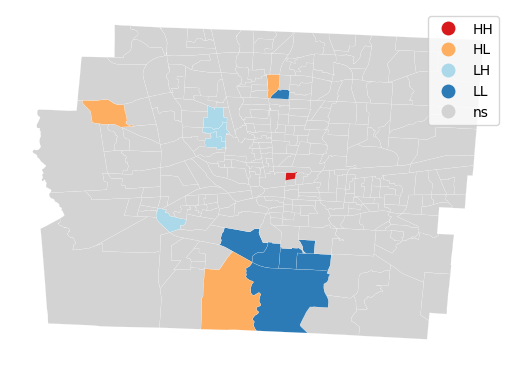

In [11]:
## SP
import csv
import numpy as np
import geopandas as gpd
from splot.esda import lisa_cluster

with open('data/theta/SCM_SP_franklin.csv', newline='') as f:
    reader = csv.reader(f)
    data_sp = list(reader)

theta_sp = np.zeros([I, I, K])
for k in range(K):
    for i in range(I):
        if i not in V[k] and A[i, k] != 0:
            theta_sp[i, i, k] = 1
for var in data_sp:
    name = var[0].split("_")
    theta_sp[int(name[1]), int(name[2]), int(name[3])] = var[1]

K2 = hist2.shape[1] - 1
Q2 = np.zeros([K2, K])
for idx2, col2 in enumerate(hist2.iloc[:,1:].columns):
    x = col2[0:2]
    y = col2[2:4]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2] and y == col[4:6]:
            Q2[idx2, idx] = 1
        else:
            Q2[idx2, idx] = 0
theta2_sp = np.zeros([I, I, K2])
for k2 in range(K2):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q2[k2, k] * theta_sp[i, j, k] * A[i, k]
                sum2 += Q2[k2, k] * A[i, k]
            theta2_sp[i, j, k2] = sum1 / sum2           
theta2_sp[~np.isfinite(theta2_sp)] = 0

A2 = hist2.iloc[:,1:].to_numpy()
A2_sp = np.zeros([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in range(I):
            sum += theta2_sp[i, j, k2] * A2[i, k2]
        A2_sp[j, k2] = sum

A2_sp = pd.DataFrame(A2_sp)
A2_sp["TRACT"] = hist2["TRACT"]
merged_sp = merged_sp.join(A2_sp.set_index('TRACT'))
merged_sp["0101_pct_after"] = merged_sp[2]/(merged_sp[0]+merged_sp[1]+merged_sp[2]+merged_sp[3]+merged_sp[4]+merged_sp[5]+merged_sp[6]+merged_sp[7]+merged_sp[8]+merged_sp[9]+merged_sp[10]+merged_sp[11]+merged_sp[12]+merged_sp[13]) * 100
merged_sp['0101_pct_after'] = merged_sp['0101_pct_after'].fillna(0)
merged_sp = merged_sp.sort_index()

gdf['GEOID10'] = gdf['GEOID10'].astype(str)
w = weights.distance.KNN.from_dataframe(gdf, k=20)
w.transform = 'R'
lisa_sp = esda.moran.Moran_Local(merged_sp["0101_pct_after"], w)
fig = lisa_cluster(lisa_sp, gdf)
plt.savefig('plot/lisa_scm_sp_franklin.eps', format='eps')